In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from PIL import Image
from sklearn.naive_bayes import MultinomialNB
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Завантажуємо дані - це датасет з першої лаби 
df = pd.read_csv('weather_classification_data.csv')

In [11]:
# Виведення назв колонок і розміру датасету
print("Назви колонок:", df.columns)
print("Розмір датасета:", df.shape)

Назви колонок: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')
Розмір датасета: (13200, 11)


In [12]:
# Перетворення категоріальних змінних за допомогою LabelEncoder
label_encoders = {}
categorical_cols = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Зберігаємо LabelEncoder для кожної колонки
    
    # Виводимо розшифровку значень
    print(f"Розшифровка для '{col}':")
    for idx, class_ in enumerate(le.classes_):
        print(f"  {idx}: {class_}")

Розшифровка для 'Cloud Cover':
  0: clear
  1: cloudy
  2: overcast
  3: partly cloudy
Розшифровка для 'Season':
  0: Autumn
  1: Spring
  2: Summer
  3: Winter
Розшифровка для 'Location':
  0: coastal
  1: inland
  2: mountain
Розшифровка для 'Weather Type':
  0: Cloudy
  1: Rainy
  2: Snowy
  3: Sunny


In [13]:
# Нормалізація числових значень
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [14]:
# Виділимо дані без цільової змінної для PCA і t-SNE
X = df.drop(columns=['Weather Type'])
y = df['Weather Type']

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

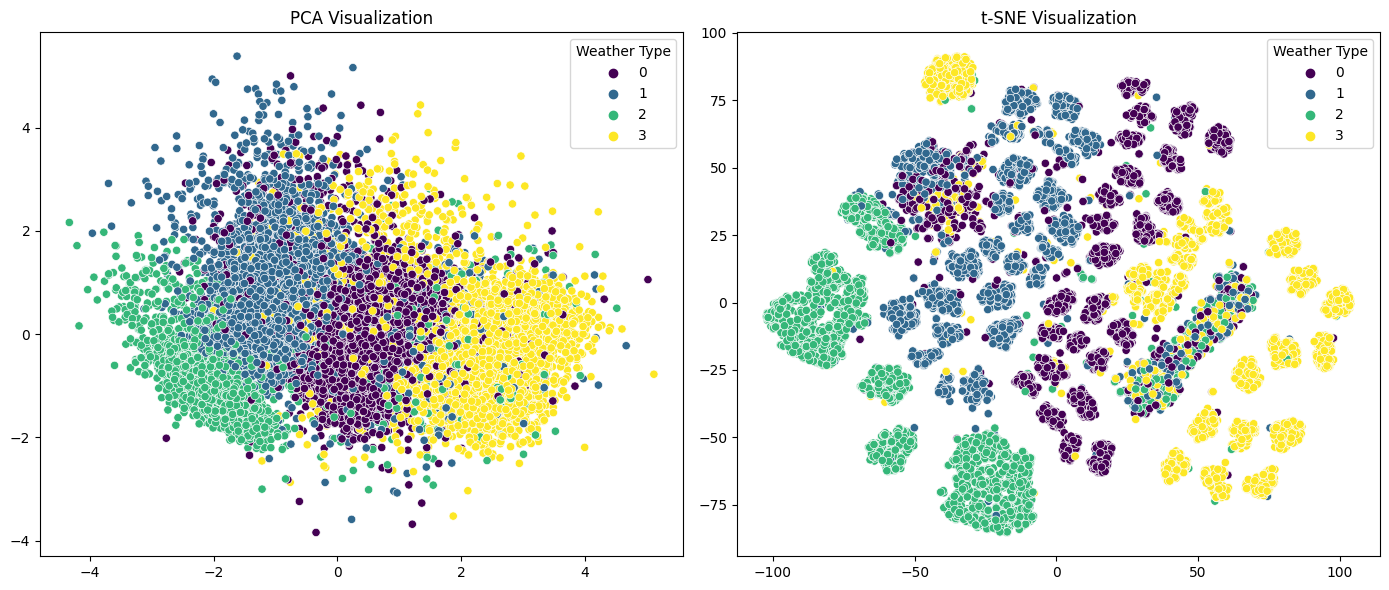

In [15]:
# Візуалізація PCA
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', legend='full')
plt.title('PCA Visualization')

# Візуалізація t-SNE
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='viridis', legend='full')
plt.title('t-SNE Visualization')

plt.tight_layout()
plt.show()

Далі я навожу два різних кода для квантування зображення Перший менш оптимізований ніж другий, тому виконується набагато довше. Другий код був зроблений з використанням наданого до завдання сайту якості прикладу.

In [18]:
# Функція для квантування зображення
def quantize_image(image, k):
    # Перетворення зображення в двовимірний масив пікселів (RGB)
    pixels = np.array(image).reshape(-1, 3)
    
    # Використання k-means для квантування
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pixels)
    
    # Замінюємо кольори пікселів центроїдами кластерів
    new_pixels = kmeans.cluster_centers_[kmeans.labels_]
    new_image = new_pixels.reshape(image.size[1], image.size[0], 3).astype(np.uint8)
    
    return Image.fromarray(new_image)

In [19]:
# Завантаження зображення через Pillow
image_path = 'myimage.jpg'
image = Image.open(image_path)

C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

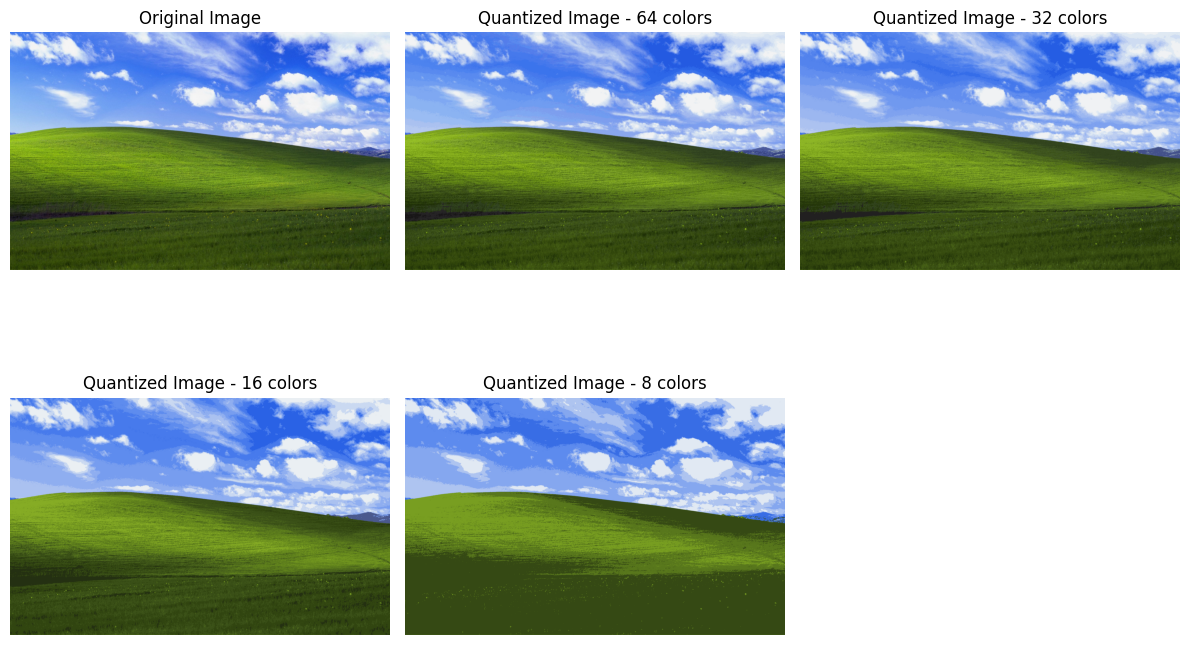

In [20]:
# Візуалізація оригінального зображення та квантування для різних рівнів
levels = [64, 32, 16, 8]

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

for i, k in enumerate(levels):
    quantized_image = quantize_image(image, k)
    plt.subplot(2, 3, i+2)
    plt.imshow(quantized_image)
    plt.title(f'Quantized Image - {k} colors')
    plt.axis('off')

plt.tight_layout()
plt.show()

Другий код:


Fitting model with 64 colors


C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


done in 0.210s.
Predicting color indices for 64 colors
done in 0.092s.

Fitting model with 32 colors


C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


done in 0.155s.
Predicting color indices for 32 colors
done in 0.057s.

Fitting model with 16 colors


C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


done in 0.150s.
Predicting color indices for 16 colors
done in 0.042s.

Fitting model with 8 colors


C:\Users\alkov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


done in 0.124s.
Predicting color indices for 8 colors
done in 0.034s.


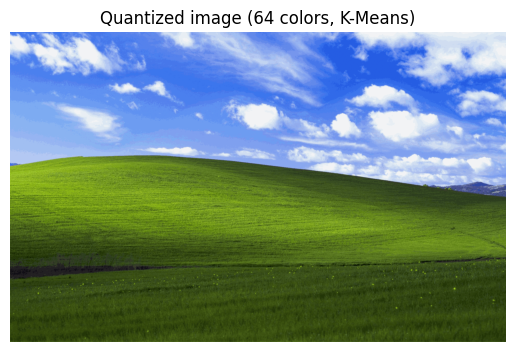

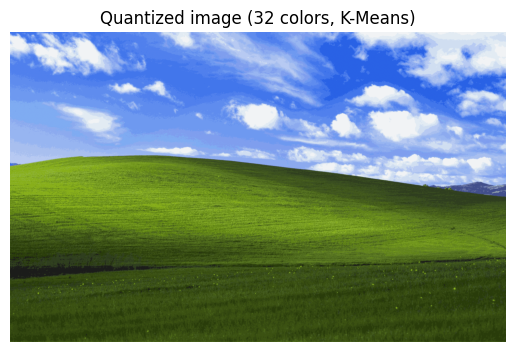

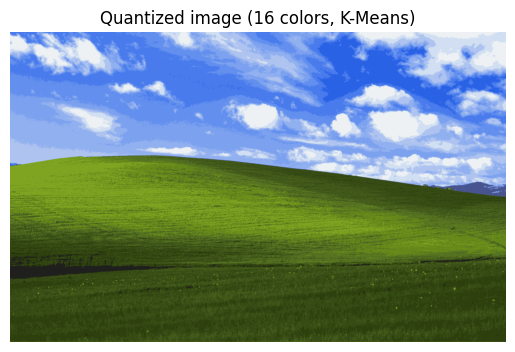

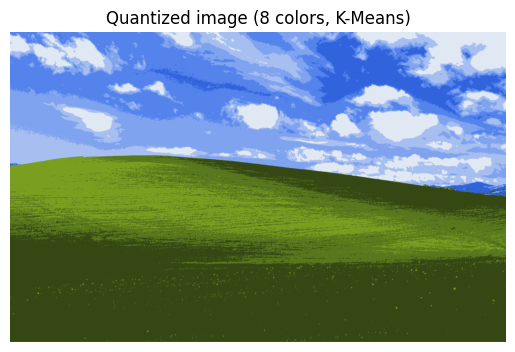

In [22]:
# Функція для відтворення зображення з кодової книги та міток
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

# Завантаження та підготовка зображення
image_path = 'myimage.jpg' 
image = Image.open(image_path)
image = np.array(image, dtype=np.float64) / 255  # Масштабування пікселів до [0, 1]

# Вимірювання розмірів зображення
w, h, d = original_shape = tuple(image.shape)
assert d == 3 
image_array = np.reshape(image, (w * h, d))

# Квантування для кожної глибини кольору
levels = [64, 32, 16, 8]

for n_colors in levels:
    print(f"\nFitting model with {n_colors} colors")
    t0 = time()
    # Вибір випадкової підвибірки пікселів для навчання
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print(f"done in {time() - t0:0.3f}s.")

    # Отримання міток для всіх пікселів
    print(f"Predicting color indices for {n_colors} colors")
    t0 = time()
    labels = kmeans.predict(image_array)
    print(f"done in {time() - t0:0.3f}s.")

    # Створення та відображення квантованого зображення
    plt.figure()
    plt.axis("off")
    plt.title(f"Quantized image ({n_colors} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.show()


In [5]:
# Завантажте набір даних
df = pd.read_csv("df_file.csv")
print(df)

                                                   Text  Label
0     Budget to set scene for election\n \n Gordon B...      0
1     Army chiefs in regiments decision\n \n Militar...      0
2     Howard denies split over ID cards\n \n Michael...      0
3     Observers to monitor UK election\n \n Minister...      0
4     Kilroy names election seat target\n \n Ex-chat...      0
...                                                 ...    ...
2220  India opens skies to competition\n \n India wi...      4
2221  Yukos bankruptcy 'not US matter'\n \n Russian ...      4
2222  Survey confirms property slowdown\n \n Governm...      4
2223  High fuel prices hit BA's profits\n \n British...      4
2224  US trade gap hits record in 2004\n \n The gap ...      4

[2225 rows x 2 columns]


Dataset contains two features text and label.
No. of Rows : 2225
No. of Columns : 2

T ext:It contains different categories of text data
**Label: **It contains labels for five different categories : 0,1,2,3,4

Politics = 0
Sport = 1
Technology = 2
Entertainment =3
Business = 4

In [6]:
# Передобробка тексту
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

def preprocess_text(text):
    # Видалення пунктуації і приведення до нижнього регістру
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Видалення стоп-слів
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

df['text_clean'] = df['Text'].apply(preprocess_text)
df['text_clean']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alkov\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'was', "haven't", "wasn't", 'theirs', "isn't", 'my', 'i', 'over', 'where', 'all', 'me', 'before', 'didn', 'a', 'under', 'again', 'do', 'nor', 'after', 'in', 'why', 'for', "weren't", "shouldn't", 'we', 'during', "that'll", 'is', 'between', 'she', 'when', "shan't", 'shan', "you'd", 'about', 'not', 'out', 'ourselves', 'they', 'more', 'd', 'itself', 'very', "couldn't", 'mustn', 'only', "you'll", 'those', 'by', 'doing', 'been', 'what', 'am', 've', "mustn't", 'don', 'same', "didn't", 'doesn', 'there', "wouldn't", 'into', 'off', 'no', 'himself', 'ours', 'other', 'him', 'further', 'ain', 'herself', 'myself', 't', 'once', 'm', "hasn't", 'both', "won't", 'that', 'so', "hadn't", 'isn', "doesn't", 'or', 'such', "you've", "should've", 'their', 'wasn', 'are', 'up', 'how', 'has', 'if', 'o', 'won', 'above', 'hasn', 'he', 'and', 'now', 'hadn', 'ma', 'aren', 'some', 'here', 'our', 'll', 'through', 'whom', 'needn', 'having', 'while', 'does', 'as', 's', 'yours', 'mightn', 'yourselves', "it's", 'most', 'b

0       budget set scene election gordon brown seek pu...
1       army chiefs regiments decision military chiefs...
2       howard denies split id cards michael howard de...
3       observers monitor uk election ministers invite...
4       kilroy names election seat target exchat show ...
                              ...                        
2220    india opens skies competition india allow dome...
2221    yukos bankruptcy us matter russian authorities...
2222    survey confirms property slowdown government f...
2223    high fuel prices hit bas profits british airwa...
2224    us trade gap hits record 2004 gap us exports i...
Name: text_clean, Length: 2225, dtype: object

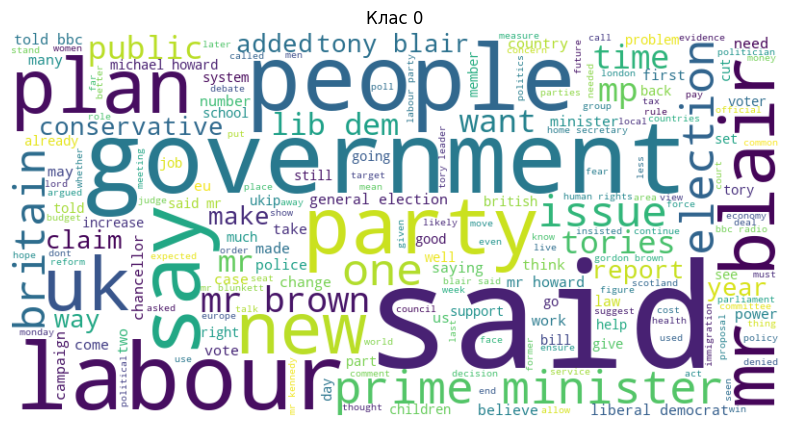

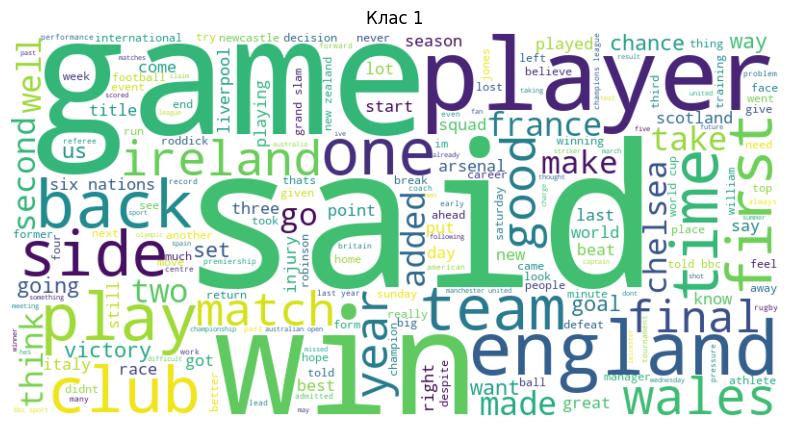

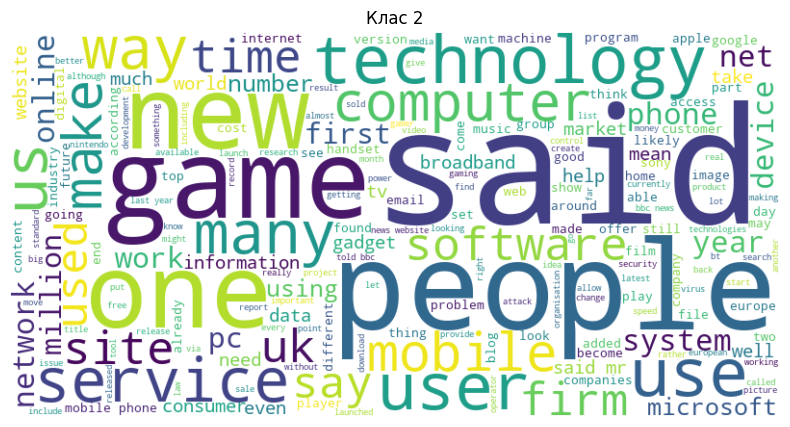

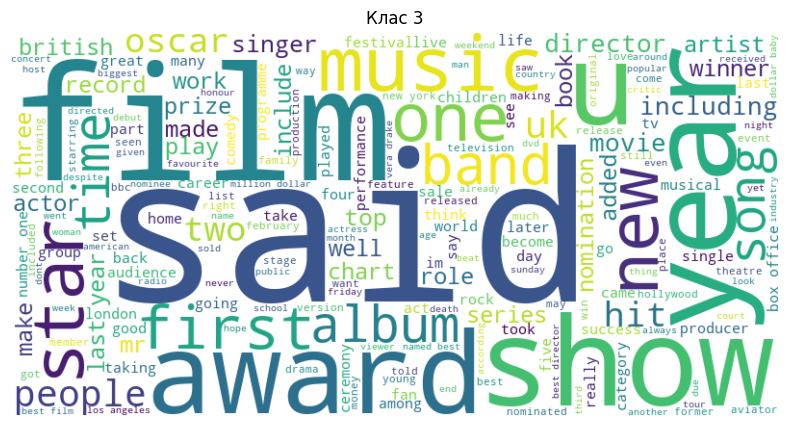

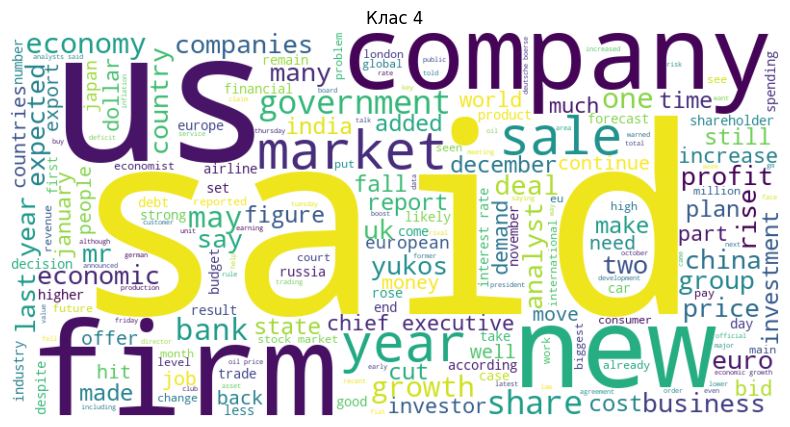

In [7]:
# Функція для побудови хмари слів
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Побудова хмари слів для кожної категорії
for label in df['Label'].unique():
    plot_wordcloud(df[df['Label'] == label]['text_clean'], f"Клас {label}")

In [8]:
# Векторизація тексту
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['text_clean'])
y = df['Label']


# Розбиття даних на тренувальні та тестові набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Навчання класифікатора
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Прогнозування
y_pred = classifier.predict(X_test)

# Оцінка якості
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9446107784431138
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       131
           1       0.97      0.98      0.98       159
           2       0.95      0.88      0.92       117
           3       0.95      0.93      0.94       108
           4       0.91      0.96      0.94       153

    accuracy                           0.94       668
   macro avg       0.95      0.94      0.94       668
weighted avg       0.95      0.94      0.94       668

